In [245]:
import numpy as np
import sklearn as sk
import numpy.random as random
from scipy import stats
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML, Image

from  scipy.optimize import line_search
from functools import partial

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd
import math
%matplotlib inline

Q1) Give a graphical illustration of the central limit theorem


In [249]:
#choose parameters a,b of the beta distribution a>0,b>0 
a=2;b=4
replications=1000
n=100

<IPython.core.display.Javascript object>


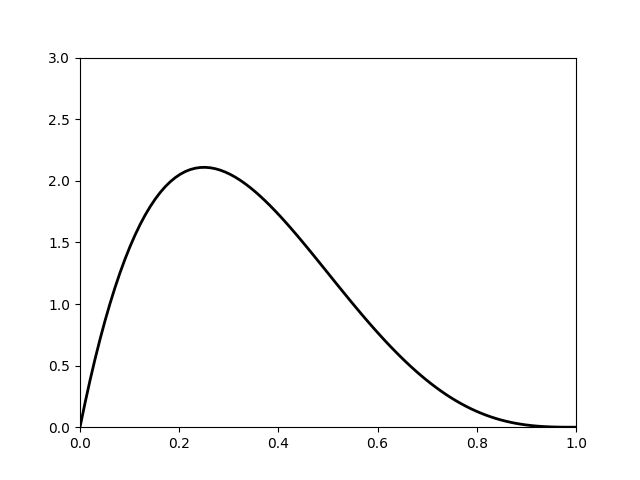

<IPython.core.display.Javascript object>


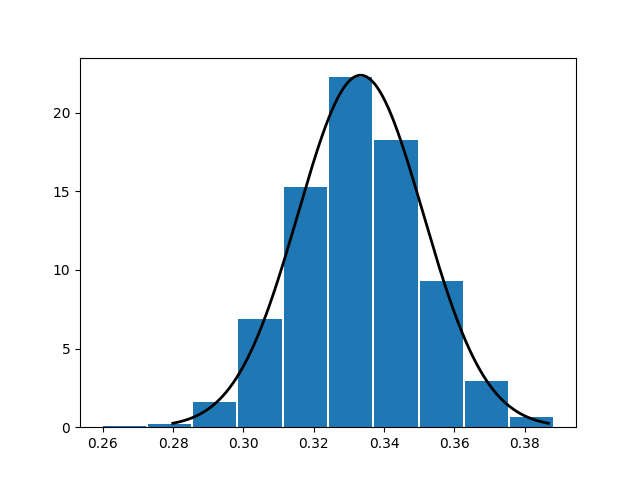

<IPython.core.display.Javascript object>


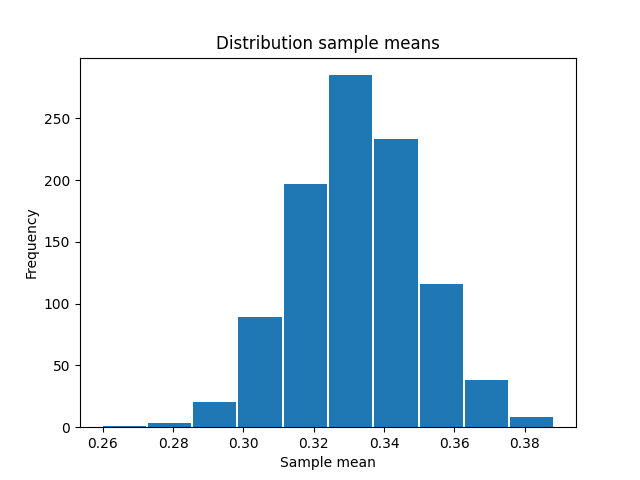

In [250]:
%matplotlib notebook
nFrames=100
nSec=10



distribution = stats.beta(a, b)


fig, ax = plt.subplots(1, 1)
x = np.linspace(0,
                1, 100)
ax.plot(x, distribution.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.xlim([0, 1])
plt.ylim([0,3])
plt.show()

means = np.zeros(replications)
for i in range(0,replications):
    sample = distribution.rvs(size=n)
    means[i]=np.average(sample)
    
plt.show()
plt.figure()

plt.hist(means,rwidth=0.95,density=True)

mu=distribution.stats('m')
var=distribution.stats('v')


x= np.linspace(mu-(3*math.sqrt(1/n*var)),
                mu+(3*math.sqrt(1/n*var)), 1000)

cltdist=stats.norm(mu,math.sqrt(1/n*var))
plt.plot(x, cltdist.pdf(x), 'k-', lw=2)
plt.show()


# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    
    plt.cla()
    if current == replications: 
        a.event_source.stop()

    plt.hist(means[0:math.floor(current/nFrames*replications)],rwidth=0.95)
    plt.gca().set_title('Distribution sample means')
    plt.gca().set_xlabel('Sample mean')
    plt.gca().set_ylabel('Frequency')

    
anim = animation.FuncAnimation(plt.figure(), clt,frames=nFrames,repeat=False, interval=((nSec*1000)/nFrames))

anim



(Q2) Run a gradient algorithm to find the solution to x : Ax = b where b = (1, . . . , 1) ∈ Rp and
A ∈ Rp×p, p = 100 is the upper triangular matrix with only ones (hint: introduce a convenient
loss function). With a starting point x = 0, evaluate the rate of convergence of your algorithm

In [218]:
def derivative(x, A, b):
    return A.dot(x)-b


def gradientdescent(A,b,stepsize,trueparam):
    xinit=np.zeros(A.shape[1])
    A[0]=0.1
    tol=0.001
    maxiter=10000
    
    xold=xinit
    error = 10
    i=0
    errors=np.zeros(maxiter)
    while(error>tol and i <maxiter):
        gradient=derivative(xold,A,b)
        xnew=xold- np.dot(stepsize(A,b,xold,i,gradient), gradient)
        errors[i]= np.linalg.norm(xnew-trueparam)
        error = np.linalg.norm(A.dot(xnew)-b)
        xold=xnew
        
        i=i+1
    print(i)
    return xnew,errors[:i],i

def objective(x,A,b):
    return 0.5*x.T.dot(A).dot(x)-x.T.dot(b)


def stephessian(A,b,xold,t,grad):
    return np.linalg.inv(A)

def stepDecay(A,b,xold,t,grad):
    return 1/(A.shape[0]+math.log(t+1))

def stepConstant(A,b,xold,t,grad):
    return 1/(A.shape[0]*10)

#def stepTrad(A,b,xold,t,grad):
#    return grad.dot(grad)/(grad.T.dot(A+np.eye(A.shape[0])).dot(grad))



In [196]:
def derivativeStochastic(x, A, b,sample):
    return A[sample,:].dot(x)-b

In [206]:
sample = [1,2,3,4,5,6]
xinit=np.zeros(A.shape[1])
A[:,sample].dot(xinit[sample])-b
#derivativeStochastic(xinit,A,b,sample)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

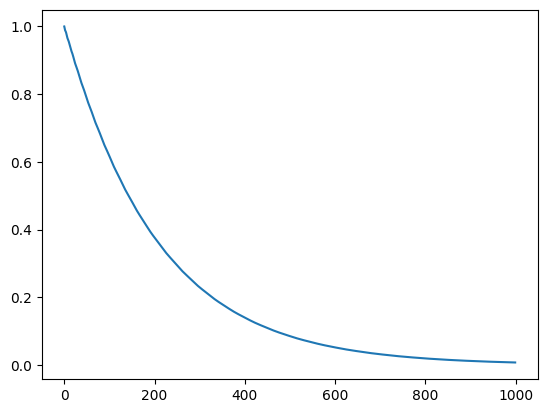

In [221]:
%matplotlib inline
p=200
A= np.triu(np.ones(p),k=0)
b= np.ones(p)
A.shape[1]
trueparam=np.linalg.inv(A).dot(b)

xhat,errors,maxiter=gradientdescentOLS(A,b,1/100,trueparam)


plt.figure()
plt.plot(range(maxiter),errors)
plt.show()

(Q3) Run a stochastic a stochastic version of the previous algorithm (hint: randomize the loss function
using coordinate sampling)

(Q4) Download the diabetes dataset from sklearn. Run and evaluate the nerest neigbor algorithm.
Compare the different values of k using a proper tools.

In [231]:
data,target=datasets.load_diabetes(return_X_y=True,scaled=True,as_frame=True)

In [241]:
data =np.array(data)

In [243]:
#run K-fold with different number of neighbors
model=KNN(n_neighbors=5).fit(data[10:,:],target[10:])
print(model.predict(data[0:10,:]))
print(target[0:10])

[127.  52.  83.  93.  50.  61.  43.  69.  83.  52.]
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: target, dtype: float64


In [ ]:



(Q5) Select the most important variables using the method of your choice.
(Q6) Evaluate the nerest neigbor algorithm on different values of k based on the most important variables
(from the question before)
(Q7) Run a recursive version of the nearest neigbour algorithm. Compare it to the standard version.
(Q8) Run a subsambling coordinates version of the nearest neigbour algorithm. Compare it to the
standard algorithm.

In [220]:
def derivativeOLS(x, A, b):
    return 2*A.T.dot(A.dot(x)-b)

def gradientdescentOLS(A,b,stepsize,trueparam):
    xinit=np.zeros(A.shape[1])
    xinit[0]=0.1
    tol=0.001
    maxiter=1000
    
    xold=xinit
    error = 1
    i=0
    errors=np.zeros(maxiter)
    while(error>tol and i <1000):
        xnew=xold- stepsize*derivative(xold,A,b)
        errors[i]= np.linalg.norm(xnew-trueparam)
        error = np.linalg.norm(A.dot(xnew)-b)
        xold=xnew
        i=i+1
    return xnew,errors[:i],i

In [ ]:
p=10
A= np.triu(np.ones(p),k=0)
b= np.ones(p)
A.shape[1]
xhat,errors,maxiter=gradientdescent(A,b,1/10)
print(xhat)
plt.plot(errors)
plt.show()
plt.plot(np.log(errors))